# Analiza povezanosti prinosa dionica (UniCredit vs. ZABA)

**Emil Baltić Hrsan**

Cilj ovog projekta je **analizirati vezu dnevnih prinosa dionica UniCredit grupe na Milanskoj i Zagrebačke banke na Zagrebačkoj burzi** tijekom posljednjih 10 godina. Kako je Unicredit grupa vlasnik 96.2% Zagrebačke banke (izvor: www.companywall.hr/tvrtka/zagrebacka-banka-dd/MM3eGxED), očekujem da će postojati statistički značajna pozitivna veza između ove dvije varijable.

Napomena: U nastavku ćemo Zagrebačku banku skraćeno označavati sa ZABA, a UniCredit grupu s UCG.

Prvo uvozimo neke osnovne biblioteke potrebne za rad s `DataFrame`-ovima.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Zatim preuzimamo podatke o cijeni UCG dionica u razdoblju od 1.1.2015. do 1.1.2025. s www.finance.yahoo.com , odnosno pomoću biblioteke `yfinance` naredbama:

`import yfinance as yf`

`ucg_download = yf.download("UCG.MI",start="2015-1-1", end="2025-01-01")`

Zatim pohranjujemo `DataFrame` u `.csv` datoteku naredbom:

`ucg_download.to_csv('ucg.csv',sep=',')`

Prethodne naredbe nisu napisane u ćelije s kodom zbog problema s nepouzdanosti biblioteke `yfinance`. Unaprijed su izvršene, te su ovdje navedene samo radi demonstracije. Zato sada učitavamo podatke sljedećom naredbom.

In [2]:
ucg = pd.read_csv('ucg.csv', header=0, skiprows=[1,2])
ucg

,Price,Close,High,Low,Open,Volume
0,2015-01-02,19.710062,19.927652,19.329279,19.546869,9840669
1,2015-01-05,18.404520,19.891388,18.404520,19.546869,17285858
2,2015-01-06,18.150663,18.767170,18.132531,18.440783,16502886
3,2015-01-07,17.972963,18.513314,17.813397,18.241324,19171017
4,2015-01-08,18.839699,18.984760,18.168797,18.350121,19968387
...,...,...,...,...,...,...
2538,2024-12-19,36.482449,37.428594,36.482449,37.166584,7859904
2539,2024-12-20,36.535820,36.623157,35.613933,36.293218,13196802
2540,2024-12-23,36.594044,36.836645,36.244697,36.550377,4019905
2541,2024-12-27,37.210255,37.287885,36.477596,36.729901,4258139


Nakon toga s web-stranica Zagrebačke burze preuzimamo podatke o cijeni dionica ZABA-e u istom razdoblju u obliku `.csv` datoteke te ih spremamo u `DataFrame`. 

In [3]:
zaba = pd.read_csv("XZAG-SecurityHistory-HRZABARA0009-2015-01-01 - 2025-01-01.csv", sep=";")
zaba

,mic,symbol,isin,date,trading_model_id,open_price,high_price,low_price,last_price,vwap_price,change_prev_close_percentage,num_trades,volume,turnover,price_currency,turnover_currency
0,XZAG,ZABA,HRZABARA0009,2024-12-30,CT,"27,60","27,60","27,00","27,00","27,1953502886570","-2,17",66,"12818,00000","348590,00",EUR,EUR
1,XZAG,ZABA,HRZABARA0009,2024-12-27,CT,"28,00","28,00","27,50","27,60","27,8333896016210","-1,78",39,"2962,00000","82442,50",EUR,EUR
2,XZAG,ZABA,HRZABARA0009,2024-12-23,CT,"28,10","28,10","27,80","28,10","28,0192019950120","0,36",23,"1604,00000","44942,80",EUR,EUR
3,XZAG,ZABA,HRZABARA0009,2024-12-20,CT,"27,90","28,20","27,10","28,00","27,7452637889690","0,36",44,"5004,00000","138837,30",EUR,EUR
4,XZAG,ZABA,HRZABARA0009,2024-12-19,CT,"27,80","28,20","27,30","27,90","27,7759546539380","0,36",43,"3352,00000","93105,00",EUR,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,XZAG,ZABA,HRZABARA0009,2015-01-13,CT,"34,05","34,05","34,05","34,05","34,0500000000000","-2,71",1,"15,00000","510,75",HRK,HRK
2398,XZAG,ZABA,HRZABARA0009,2015-01-12,CT,"35,00","35,00","35,00","35,00","35,0000000000000","2,49",1,"23,00000","805,00",HRK,HRK
2399,XZAG,ZABA,HRZABARA0009,2015-01-09,CT,"35,45","35,45","34,00","34,15","34,1520009471940","-2,75",27,"8446,00000","288447,80",HRK,HRK
2400,XZAG,ZABA,HRZABARA0009,2015-01-08,CT,"35,00","35,45","34,50","34,96","34,9604850746270","4,20",11,"1340,00000","46847,05",HRK,HRK


Sada iz dobivenih `DataFrame`-ova uzimamo stupce koji nam trebaju, ali prvo pretvorimo podatke u odgovarajući format.

Prvo za UCG, pretvaramo datume u format `datetime`, te cijene u `float`.

In [4]:
ucg['Close'] = pd.to_numeric(ucg['Close'])
ucg['Date'] = pd.to_datetime(ucg['Price'], dayfirst=False)

Sada možemo iz gornjeg `DataFrame`-a uzeti stupac Close.

In [5]:
ucg_returns = ucg[['Date','Close']]
ucg_returns

,Date,Close
0,2015-01-02,19.710062
1,2015-01-05,18.404520
2,2015-01-06,18.150663
3,2015-01-07,17.972963
4,2015-01-08,18.839699
...,...,...
2538,2024-12-19,36.482449
2539,2024-12-20,36.535820
2540,2024-12-23,36.594044
2541,2024-12-27,37.210255


Zatim mijenjamo stupac s datumima u stupac indeksa i pretvaramo podatke u postotnu razliku kako bi dobili dnevne prinose.

In [6]:
ucg_returns=ucg_returns.set_index('Date').pct_change()
ucg_returns

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.066237
2015-01-06,-0.013793
2015-01-07,-0.009790
2015-01-08,0.048224
...,...
2024-12-19,-0.028553
2024-12-20,0.001463
2024-12-23,0.001594


Sljedećom naredbom provjeravamo ponavljaju li se datumi.

In [7]:
ucg_returns.index.duplicated().any()

np.False_

Zatim isto radimo za ZABA-u, ali ovom `DataFrame`-u treba i obrnuti redoslijed te izbaciti retke koji se ponavljaju.

In [8]:
zaba_returns=zaba[['date','last_price']]
zaba_returns

,date,last_price
0,2024-12-30,"27,00"
1,2024-12-27,"27,60"
2,2024-12-23,"28,10"
3,2024-12-20,"28,00"
4,2024-12-19,"27,90"
...,...,...
2397,2015-01-13,"34,05"
2398,2015-01-12,"35,00"
2399,2015-01-09,"34,15"
2400,2015-01-08,"34,96"


Pretvaramo datume u format `datetime`, te cijene u `float`.

In [9]:
zaba_returns["last_price"] = zaba_returns["last_price"].str.replace(',', '.')
zaba_returns["last_price"] = pd.to_numeric(zaba_returns["last_price"])
zaba_returns["date"] = pd.to_datetime(zaba_returns["date"], dayfirst=False)

Zatim mijenjamo stupac s datumima u stupac indeksa, okrećemo redoslijed `DataFrame`-a i primjenjujemo `pct_change`.

In [10]:
zaba_returns=zaba_returns.set_index('date')
zaba_returns=zaba_returns.iloc[::-1]
zaba_returns=zaba_returns.pct_change()
zaba_returns

,last_price
date,
2015-01-07,NaN
2015-01-08,0.027631
2015-01-09,-0.023169
2015-01-12,0.024890
2015-01-13,-0.027143
...,...
2024-12-19,0.003597
2024-12-20,0.003584
2024-12-23,0.003571


Provjeravamo ponavljaju li se datumi.

In [11]:
zaba_returns.index.duplicated().any()

np.True_

Kako je rezultat bio `True`, provjeravamo `.csv` datoteku Zagrebačke burze. Neki datumi su dvaput navedeni s razlikom da u jednom u stupcu 'trading_model_id' piše BLOCK', a u drugom 'CT'. S 'CT' je označeno normalno tržišno trgovanje, a s 'BLOCK' takozvane block trades, odnosno kada jedan kupac kupuje veliki broja dionica odjednom. Te datume nećemo uzimati u obzir pa ih uklanjamo na slijedeći način.

In [12]:
zaba_returns = zaba_returns[~zaba_returns.index.duplicated(keep=False)]
zaba_returns.index.duplicated().any()

np.False_

Sada spajamo podatke u jedan `DataFrame` te preimenujemo stupce.

In [13]:
returns=pd.concat([ucg_returns,zaba_returns], axis=1)
returns=returns.rename(columns={'last_price':'ZABA', 'Close' : 'UCG'})
returns

,UCG,ZABA
2015-01-02,NaN,NaN
2015-01-05,-0.066237,NaN
2015-01-06,-0.013793,NaN
2015-01-07,-0.009790,NaN
2015-01-08,0.048224,0.027631
...,...,...
2024-12-19,-0.028553,0.003597
2024-12-20,0.001463,0.003584
2024-12-23,0.001594,0.003571
2024-12-27,0.016839,-0.017794


Vidimo da u nekim redcima postoje `NaN` vrijednosti jer se neradni dani milanske i zagrebačke burze razlikuju za vrijeme državnih praznika. Zato izbacujemo te retke.

In [14]:
returns=returns.dropna()
returns

,UCG,ZABA
2015-01-08,0.048224,0.027631
2015-01-09,-0.054860,-0.023169
2015-01-12,0.011813,0.024890
2015-01-13,0.023551,-0.027143
2015-01-14,-0.012783,0.028781
...,...,...
2024-12-19,-0.028553,0.003597
2024-12-20,0.001463,0.003584
2024-12-23,0.001594,0.003571
2024-12-27,0.016839,-0.017794


Također trebamo provjeriti redak datuma 1.1.2023. jer je tada Hrvatska prešla na euro, a iz `.csv` tablice zaključujemo da su iznosi cijene dionica ZABA-e do 31.12.2022. u kunama, a nakon toga u eurima.

In [15]:
returns.loc['2022-12-25':].head(10)

,UCG,ZABA
2022-12-27,-0.001656,-0.003115
2022-12-28,0.004675,0.006250
2023-01-02,0.013110,-0.865528
2023-01-03,0.034508,0.011547
2023-01-04,0.037383,0.057078
2023-01-05,0.007207,0.015119
2023-01-09,-0.006797,-0.008511
2023-01-10,-0.000958,0.006438
2023-01-11,-0.014934,0.023454
2023-01-12,0.014465,0.018750


Primijetimo da 2.1. imamo neobičan pad cijene ZABA-e od gotovo 87% što je zapravo samo početak izražavanja cijena u eurima, stoga ćemo izbaciti taj redak.

In [16]:
returns=returns.drop('2023-01-02')

Slijedi statistički opis ove dvije varijable.

In [17]:
returns['UCG'].describe()

count    2362.000000
mean        0.000717
std         0.026428
min        -0.237886
25%        -0.012419
50%         0.000694
75%         0.013661
max         0.159241
Name: UCG, dtype: float64

In [18]:
returns['ZABA'].describe()

count    2362.000000
mean        0.000750
std         0.015412
min        -0.144033
25%        -0.006801
50%         0.000000
75%         0.008333
max         0.139423
Name: ZABA, dtype: float64

Primjećujemo da je aritmetička sredina obje varijable pozitivna i vrlo blizu 0, a standardna devijacija UCG-a je za više od 0.1 veća od standardne devijacije ZABA-e te UCG ima veći interkvartilni raspon.

Sada vizualiziramo ove dvije varijable.

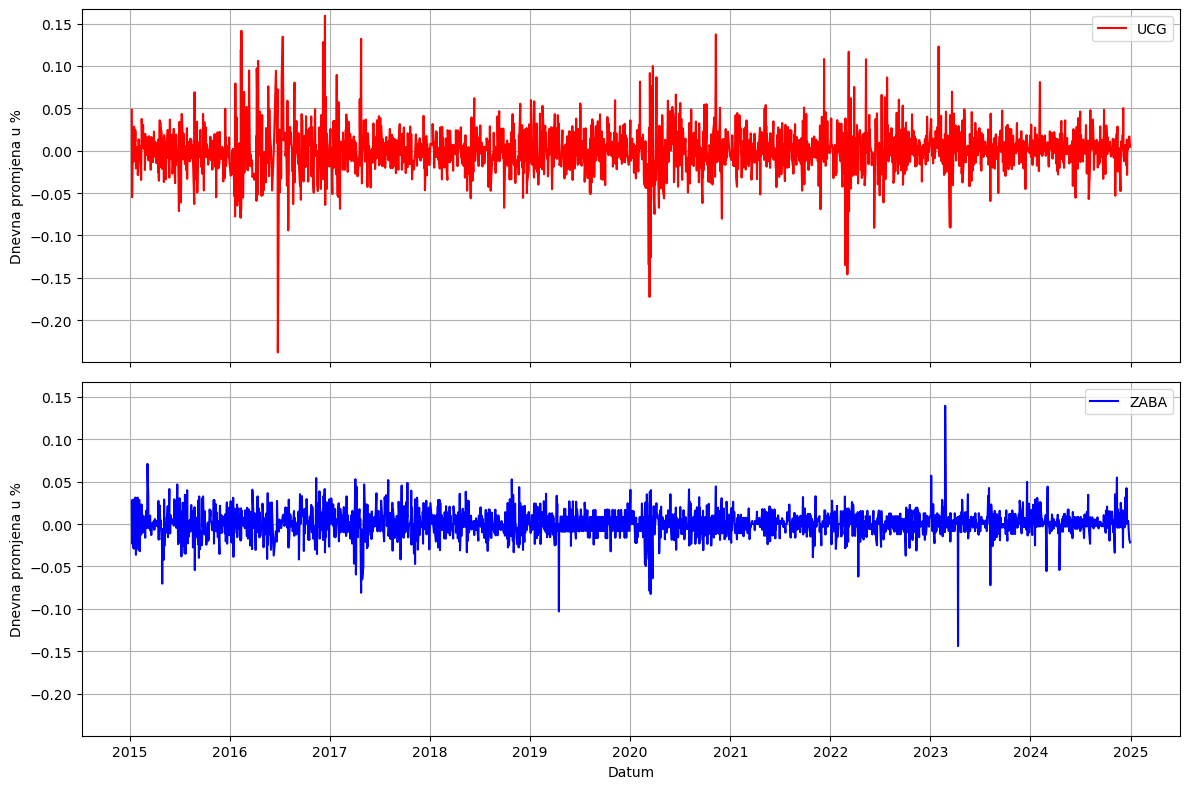

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axs[0].plot(returns.index, returns['UCG'], label='UCG', color='red')
axs[0].set_ylabel('Dnevna promjena u %')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(returns.index, returns['ZABA'], label='ZABA', color='blue')
axs[1].set_ylabel('Dnevna promjena u %')
axs[1].set_xlabel('Datum')
axs[1].legend()
axs[1].grid(True)

#izjednačavanje skale y-osi
y_min = 1.05  * min(returns['UCG'].min(), returns['ZABA'].min())
y_max = 1.05 * max(returns['UCG'].max(), returns['ZABA'].max())
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)

plt.tight_layout()

Grafovi vizualno potvrđuju prethodne zaključke o varijablama. Jasno se vidi veća standardna devijacija UCG-a te je većina vrijednosti na oba grafa grupirana oko nule. Primijetimo da smo u donjem dijelu koda gornje ćelije izjednačili skale y-osi grafova kako bi mogli ispravno vizualno usporediti njihova odstupanja.

Sada provodimo Lillieforsovu inačicu Kolomogorov-Smirnovljevog testa kako bi ispitali normalnost varijabli.

$H_0$: slučajni uzorak dolazi iz normalne razdiobe

$H_1$: slučajni uzorak ne dolazi iz normalne razdiobe

**Sve testove ćemo provoditi na razini značajnosti $\alpha$=0.05.**


Za provedbu statističkih testova koristit ćemo bibilioteke `statsmodels` te `scipy` odnosno `scipy.stats`.

Povjerimo prvo jesu li podaci o prinosu dionica Unicredit grupe normalno distribuirani.

In [20]:
from statsmodels.stats.diagnostic import lilliefors

stat_ucg, p_ucg = lilliefors(returns['UCG'],dist='norm')

print(f"KS statistika: {stat_ucg}")
print(f"P-vrijednost: {p_ucg}")

KS statistika: 0.07061873913775815
P-vrijednost: 0.0009999999999998899


P-vrijednost je manja od 0.05, stoga odbacujemo $H_0$, odnosno zaključujemo da podaci nisu normalno distribuirani.

Sada napravimo isti test za prinos dionica Zagrebačke banke.

In [21]:
stat_zaba, p_zaba = lilliefors(returns['ZABA'], dist='norm')

print(f"KS statistika: {stat_zaba}")
print(f"P-vrijednost: {p_zaba}")

KS statistika: 0.09193732577756486
P-vrijednost: 0.0009999999999998899


P-vrijednost je i u ovom slučaju manja od 0.05, stoga ni podaci o ZABA-i nisu normalno distribuirani.

Kako bi dobili predodžbu o distribuciji slučajnog uzorka, podatke ćemo vizualizirati histogramima i Q-Q grafikonima.

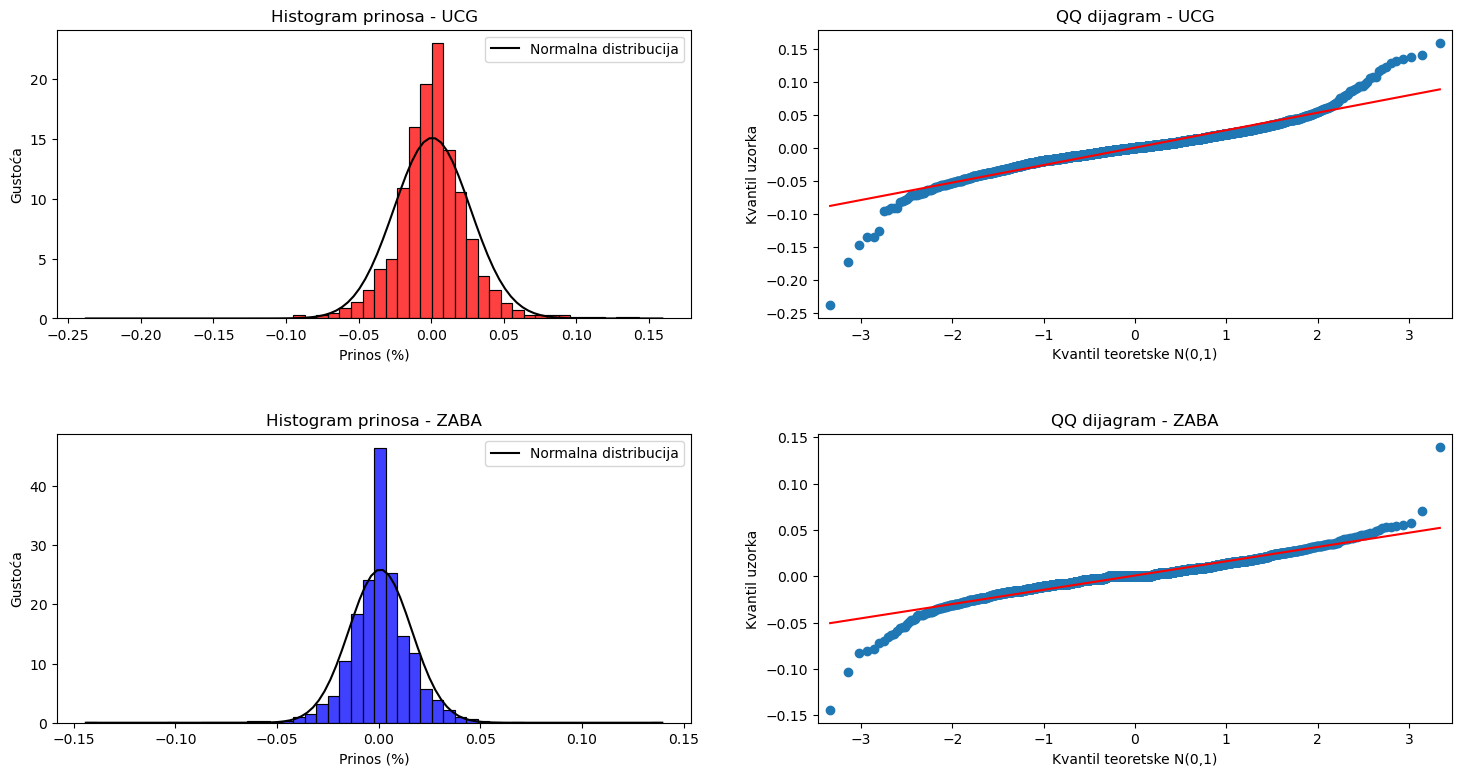

In [22]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import numpy as np
x_ucg= np.linspace(returns['UCG'].min(), returns['UCG'].max(), 100)
x_zaba = np.linspace(returns['ZABA'].min(), returns['ZABA'].max(), 100)

fig, axs = plt.subplots(2, 2, figsize=(18, 9))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

sns.histplot(returns['UCG'], kde=False, stat="density", bins=50, color='red',ax=axs[0,0])
axs[0,0].plot(x_ucg, norm.pdf(x_ucg, returns['UCG'].mean(), returns['UCG'].std()), color='black', label='Normalna distribucija')
axs[0,0].set_title('Histogram prinosa - UCG')
axs[0,0].set_xlabel('Prinos (%)')
axs[0,0].set_ylabel('Gustoća')
axs[0,0].legend()

sm.qqplot(returns['UCG'], line='s', ax=axs[0,1])
axs[0,1].set_title('QQ dijagram - UCG')
axs[0,1].set_xlabel('Kvantil teoretske N(0,1)')
axs[0,1].set_ylabel('Kvantil uzorka')

sns.histplot(returns['ZABA'], kde=False, stat="density", bins=50, color='blue',ax=axs[1,0])
axs[1,0].plot(x_zaba, norm.pdf(x_zaba, returns['ZABA'].mean(), returns['ZABA'].std()), color='black', label='Normalna distribucija')
axs[1,0].set_title('Histogram prinosa - ZABA')
axs[1,0].set_xlabel('Prinos (%)')
axs[1,0].set_ylabel('Gustoća')
axs[1,0].legend()

sm.qqplot(returns['ZABA'], line='s', ax=axs[1,1])
axs[1,1].set_title('QQ dijagram - ZABA')
axs[1,1].set_xlabel('Kvantil teoretske N(0,1)')
axs[1,1].set_ylabel('Kvantil uzorka')

plt.show()

Na histogramima smo označili krivulje teorijske normalne distribucije s parametrima aritmetičke sredine i uzoračke standardne devijacije varijabla kako bi grafički prikazali rezultate prethodnih testova. Primjećujemo znatnu razliku između histograma naših podataka i teoretskih normalnih krivulja.  Normalnost podataka promatramo i pomoću Q-Q grafova kojima uspoređujemo kvantile podataka s kvantilima jedinične normalne distribucije. Normalno distribuirani podaci grupirali bi se oko pravaca, a na našim grafovima vidimo znatno odstupanje podataka od pravaca na rubovima.

Kako varijable nisu normalno distribuirane, za usporedbu njihovih varijanci koristit ćemo Bartlettov test.

$H_0$: varijable imaju jednake varijance

$H_1$: varijable imaju različite varijance

In [23]:
stat_bart, p_bart = stats.bartlett(returns['UCG'], returns['ZABA'])

print(f"Bartlett's test statistic: {stat_bart:.4f}")
print(f"P-value: {p_bart:.10f}")

Bartlett's test statistic: 655.5487
P-value: 0.0000000000


Kako je p-vrijednost manja od 0.05, odbacujemo $H_0$, odnosno zaključujemo da varijable imaju različite varijance.

Sada provodimo t-test kako bi usporedili očekivanja varijabli. Iako nije zadovoljen uvjet normalnosti, zbog veličine uzorka opravdano je koristiti t-test.

$H_0$: varijable imaju jednaka očekivanja

$H_1$: varijable imaju različita očekivanja

In [24]:
t_stat, p_value = stats.ttest_ind(returns['UCG'], returns['ZABA'], equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.0533
P-value: 0.9575


Kako je p-vrijednost veća od 0.05, ne možemo odbaciti $H_0$, odnosno zaključujemo da varijable imaju jednako očekivanje.

Promotrimo sada korelaciju i kovarijancu ovih varijabli.

In [25]:
print(f'Kovarijanca: {returns['UCG'].cov(returns['ZABA'])}\nKorelacija: {returns['UCG'].corr(returns['ZABA'])}')

Kovarijanca: 3.1532168471038236e-05
Korelacija: 0.07741650727570466


Primjećujemo da je kovarijanca gotovo nula, ali koeficijent korelacije je pozitivan i za nekoliko redova veličine veći od kovarijance, odnosno postoji slaba pozitivna korelacija varijabli.

Sada ćemo provesti linearnu regresiju pomoću funkcije `OLS` iz biblioteke `statsmodels`. Zavisna varijabla bit će prinos ZABA-e, nezavisna UCG-a. Drugim riječima, pokušat ćemo linearnim modelom predvidjeti prinos ZABA-e na temelju prinosa UCG-a.

In [26]:
Y = returns['ZABA']
X = returns[['UCG']]
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ZABA   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     14.23
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000166
Time:                        09:52:35   Log-Likelihood:                 6511.8
No. Observations:                2362   AIC:                        -1.302e+04
Df Residuals:                    2360   BIC:                        -1.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
UCG            0.0451      0.012      3.772      0.0

Uočavamo da je rezultat linearne regresije pravac Y = 0.0451 X + 0.0007, gdje je X dnevni prinos UCG-a, a Y dnevni prinos ZABA-e. Također je p-vrijednost za oba koeficijenta manja od 0.05 pa možemo zaključiti da su oba koeficijenta statistički značajna.

Prikažimo još grafički rezultate linearne regresije.

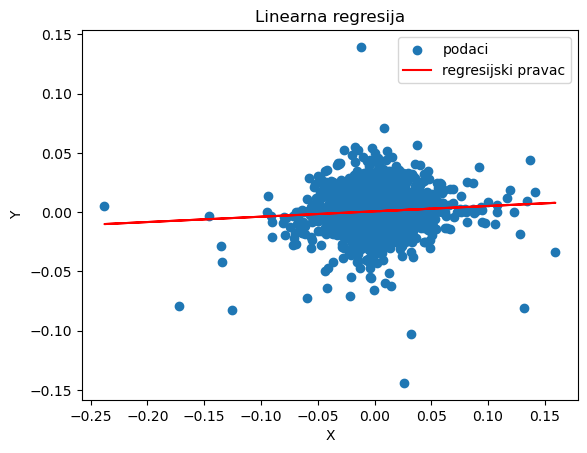

In [27]:
y_pred = result.predict(X)

plt.scatter(X['UCG'], Y, label="podaci")
plt.plot(X['UCG'], y_pred, color='red', label="regresijski pravac")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linearna regresija")
plt.legend()
plt.show()

Zaključno, komentirajmo rezultate svega što smo napravili. Statističkim testovima pokazali smo da varijable nisu normalno distribuirane, da su im varijance različite te očekivanja ista. Određivanjem koeficijenta korelacije utvrdili smo da varijable imaju slabu pozitivnu korelaciju. Provođenjem linearne regresije zaključili smo da dnevni prinos dionica UniCredit grupe na Milanskoj burzi ima slabu, ali **statistički značajnu pozitivnu vezu** s dnevnim prinosom dionica Zagrebačke banke na Zagrebačkoj burzi. Ukratko, **rast cijena dionica UCG-a za 1% predviđa rast cijena ZABA-e za 0.0451%**. Iako smo došli do statistički značajnih rezultata, ovaj model vjerojatno nije koristan za stvarnu primjenu zbog slabe korelacije varijabla i malog koeficijenta nagiba regresijskog pravca.